# GPS Team Project 1
## U-Block과 핸드폰 GPS오차를 분석
**해당 코드는 송도에서 ublock, Note10, Note9, Note8를 통해 취득한 road Data를 가공하여 오차 그래프를 생성함**

### 1. gobal variable
    * ublock  : ublock 데이터를 저장할 list 변수
    * jinsol  : Note10 데이터를 저장할 list 변수
    * soyeong : Note9 데이터를 저장할 list 변수
    * wongi   : Note8 데이터를 저장할 list 변수

### 2. class
    * timePosition : UTC시간과 경,위도 좌표데이터를 저장할 수 있는 클래스

### 3. function
    * project          : 속도를 입력받아 아래의 함수를 차례대로 호출함
    * setVelocity      : 속도를 입력받아 해당 속도에 알맞는 파일을 읽어 글로벌 변수에 저장
    * makeGGA          : 글로벌 변수에 저장된 측정 데이터에서 'XXGGA'만 추출하여 글로벌 변수에 저장
    * GGA2timePosition : 글로벌 변수에 저장된 XXGGA 데이터에서 UTC와 경,위도 데이터만 추출하여 글로벌 변수에 저장
    * plotError        : ublock을 참값으로 보고, 같은 시간에 측정된 데이터와의 오차를 그래프로 나타냄
    * utc2second       : hhmmss형의 UTC 데이터형식을 sec로 변환시켜 연속적인 데이터로 맞추어줌
    * errorCalculation : ublock을 참값으로 보고, 취득된 경위도 데이터를 통해 오차를 계산함
    
### 4. 측정 위치
![logo](https://user-images.githubusercontent.com/48685242/71309087-17469100-2447-11ea-992a-e4563387797b.png)

In [1]:
import copy
import math
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.legend as legend

In [2]:
ublock = []  # ublock -> true value
jinsol = []  # jinsol -> Note10 measured value
soyeong = [] # soyeong -> Note9 measured value
wongi = []   # wongi -> Note8 measured value

# class

In [3]:
class timePosition:
    def __init__(self, time=None, lat=None, lon=None):
        self.time = 0 if time is None else time
        self.lat = 0 if lat is None else lat
        self.lon = 0 if lon is None else lon
        
    def setPosition(self, lat, lon):
        self.lat = self.transformXY(lat)
        self.lon = self.transformXY(lon)
    
    def setTime(self, time):
        self.time = float(time)
        
    def transformXY(self, data):
        # transform lat, lon : ddmm.mmmm -> dd.mmmmmm
        original = float(data)
        loc = int(original/100)
        mm = original - loc*100
        return loc + mm/60

# function

In [4]:
def project(velocity):
    setVelocity(velocity) # all message load
    makeGGA()             # all message -> xxgga message
    GGA2timePosition()    # xxgga message -> time, lat, lon message
    plotError(velocity)   # time, lat, lon message -> error graph

In [5]:
def setVelocity(velocity):
    global ublock
    global jinsol
    global soyeong
    global wongi
    
    u = open("./roadData/ublock%d.txt" % velocity, 'r')
    j = open("./roadData/jinsol%d.txt" % velocity, 'r') 
    s = open("./roadData/soyeong%d.txt" % velocity, 'r')
    w = open("./roadData/wongi%d.txt" % velocity, 'r')
    
    uData = u.read()
    jData = j.read()
    sData = s.read()
    wData = w.read()

    ublock = uData.split("$")
    jinsol = jData.split("$")
    soyeong = sData.split("$")
    wongi = wData.split("$")
    
    u.close()
    j.close()
    s.close()
    w.close()

In [6]:
def makeGGA():
    global ublock
    global jinsol
    global soyeong
    global wongi
    
    gga = []
    for line in ublock:
        if len(line) > 5 and line[2:5] == "GGA":
            gga.append(line)
    ublock = copy.deepcopy(gga)
    
    gga = []
    for line in jinsol:
        if len(line) > 5 and line[2:5] == "GGA":
            gga.append(line)
    jinsol = copy.deepcopy(gga)
    
    gga = []
    for line in soyeong:
        if len(line) > 5 and line[2:5] == "GGA":
            gga.append(line)
    soyeong = copy.deepcopy(gga)        
            
    gga = []
    for line in wongi:
        if len(line) > 5 and line[2:5] == "GGA":
            gga.append(line)
    wongi = copy.deepcopy(gga)

In [7]:
def GGA2timePosition():
    global ublock
    global jinsol
    global soyeong
    global wongi
    
    exsistData = []
    for line in ublock:
        token = line.split(",")
        data = timePosition()
        if token[2] == '': continue # not exsist x,y data
        data.setTime(token[1]) # UTC time
        data.setPosition(token[2],token[4])
        exsistData.append(data)
    ublock = exsistData
    
    exsistData = []
    for line in jinsol:
        token = line.split(",")
        data = timePosition()
        if token[2] == '': continue # not exsist x,y data
        data.setTime(token[1]) # UTC time
        data.setPosition(token[2],token[4])
        exsistData.append(data)
    jinsol = exsistData
    
    exsistData = []
    for line in soyeong:
        token = line.split(",")
        data = timePosition()
        if token[2] == '': continue # not exsist x,y data
        data.setTime(token[1]) # UTC time
        data.setPosition(token[2],token[4])
        exsistData.append(data)
    soyeong = exsistData
    
    exsistData = []
    for line in wongi:
        token = line.split(",")
        data = timePosition()
        if token[2] == '': continue # not exsist x,y data
        data.setTime(token[1]) # UTC time
        data.setPosition(token[2],token[4])
        exsistData.append(data)
    wongi = exsistData

In [8]:
def plotError(velocity):
    global ublock
    global jinsol
    global soyeong
    global wongi
    
    jinsolError = {'time':[], 'error':[]}
    soyeongError = {'time':[], 'error':[]}
    wongiError = {'time':[], 'error':[]}
    
    for i in range(0,len(ublock)):
        ublockTime = ublock[i].time
        for j in range(len(jinsolError), len(jinsol)):
            if jinsol[j].time == ublockTime:
                jinsolError['time'].append(utc2second(ublockTime))
                jinsolError['error'].append(errorCalculation(ublock[i], jinsol[j]))
                break
            elif jinsol[j].time > ublockTime:
                break

        for j in range(len(soyeongError), len(soyeong)):
            if soyeong[j].time == ublockTime:
                soyeongError['time'].append(utc2second(ublockTime))
                soyeongError['error'].append(errorCalculation(ublock[i], soyeong[j]))
                break
            elif  soyeong[j].time > ublockTime:
                break

        for j in range(len(wongiError), len(wongi)):            
            if wongi[j].time == ublockTime:
                wongiError['time'].append(utc2second(ublockTime))
                wongiError['error'].append(errorCalculation(ublock[i], wongi[j]))
                break
            elif wongi[j].time > ublockTime:
                break

    
    
    jin, = plt.plot(jinsolError['time'], jinsolError['error'], 'r-')
    soy, = plt.plot(soyeongError['time'], soyeongError['error'], 'b-')
    won, = plt.plot(wongiError['time'], wongiError['error'], 'g-')
    
    plt.legend([jin,soy, won],['Note10','Note9','Note8'], loc=1)
    plt.title('%dkm Error' % velocity)
    plt.xlabel('Time (s)') 
    plt.ylabel('Error (m)')
    plt.rcParams["figure.figsize"] = (14,5)
    plt.rcParams["axes.grid"] = True
    plt.ylim(0, 30)
    plt.xlim(jinsolError['time'][0], jinsolError['time'][len(jinsolError['time'])-1])
    plt.show()

In [9]:
def utc2second(utcTime):
    utcTime = int(utcTime)
    hour = int(utcTime/10000)
    minute = int(utcTime/100 - hour * 100)
    second = int(utcTime - hour * 10000 - minute * 100)
    
    decimalTime = hour*3600 + minute*60 + second
    return decimalTime

In [10]:
def errorCalculation(trueVal, measVal):
    trueLatDeg = int(trueVal.lat)
    trueLatSec = trueLatDeg * 3600 + (trueVal.lat - trueLatDeg) * 100 * 60
    trueLonDeg = int(trueVal.lon)
    trueLonSec = trueLonDeg * 3600 + (trueVal.lon - trueLonDeg) * 100 * 60
    
    measLatDeg = int(measVal.lat)
    measLatSec = measLatDeg * 3600 + (measVal.lat - measLatDeg) * 100 * 60
    measLonDeg = int(measVal.lon)
    measLonSec = measLonDeg * 3600 + (measVal.lon - measLonDeg) * 100 * 60
    
    deltaLat = trueLatSec - measLatSec # latitude
    deltaLon = trueLonSec - measLonSec # longitude
    
    latDistance = deltaLat * 111 * 1000 / 3600  # unit ; m
    lonDistance = deltaLon * 88.8 * 1000 / 3600 # unit ; m

    error = math.sqrt(latDistance*latDistance + lonDistance*lonDistance)
    return error

### 에러 계산법
출처: https://lovestudycom.tistory.com/entry/위도-경도-계산법

# 30km/h

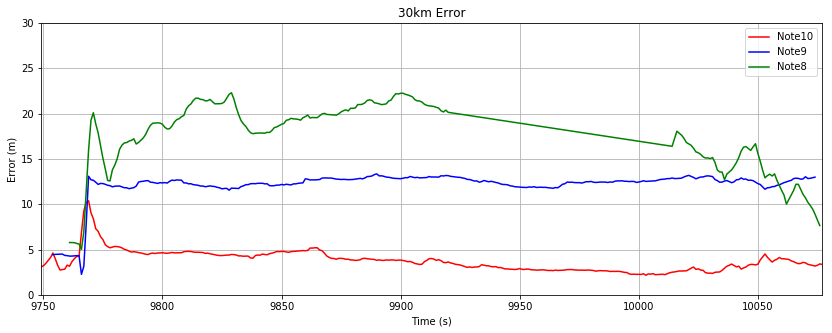

In [15]:
project(30)

# 50km/h

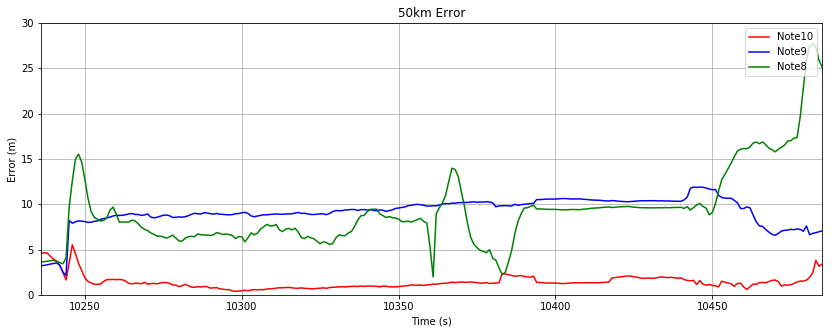

In [12]:
project(50)

# 70km/h

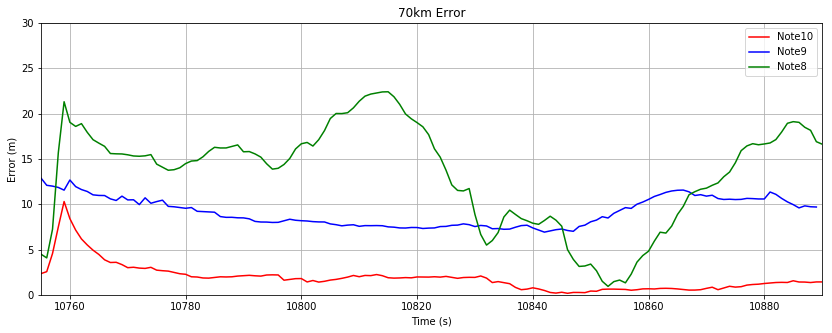

In [13]:
project(70)

# 90km/h

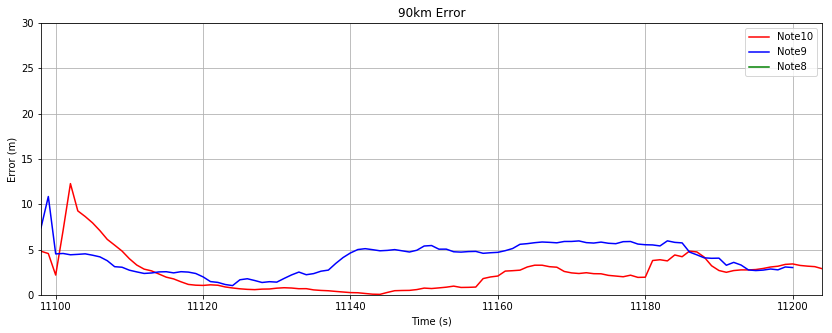

In [14]:
project(90)